In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
boston=pd.read_csv("BostonHousing.csv")

In [91]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [92]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [10]:
boston.isna().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool

In [12]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

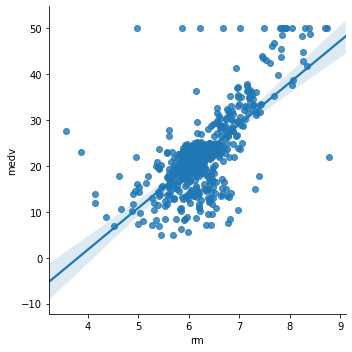

In [14]:
sns.lmplot("rm","medv",boston)

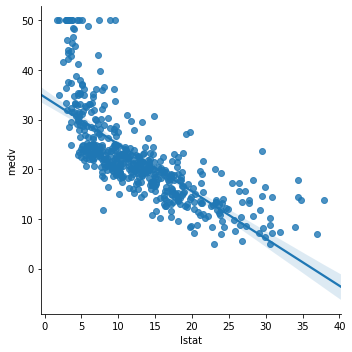

In [15]:
sns.lmplot("lstat","medv",boston)

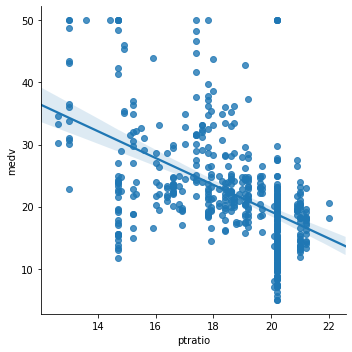

In [16]:
sns.lmplot("ptratio","medv",boston)

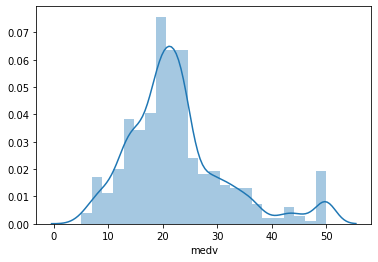

In [20]:
sns.distplot(boston["medv"])

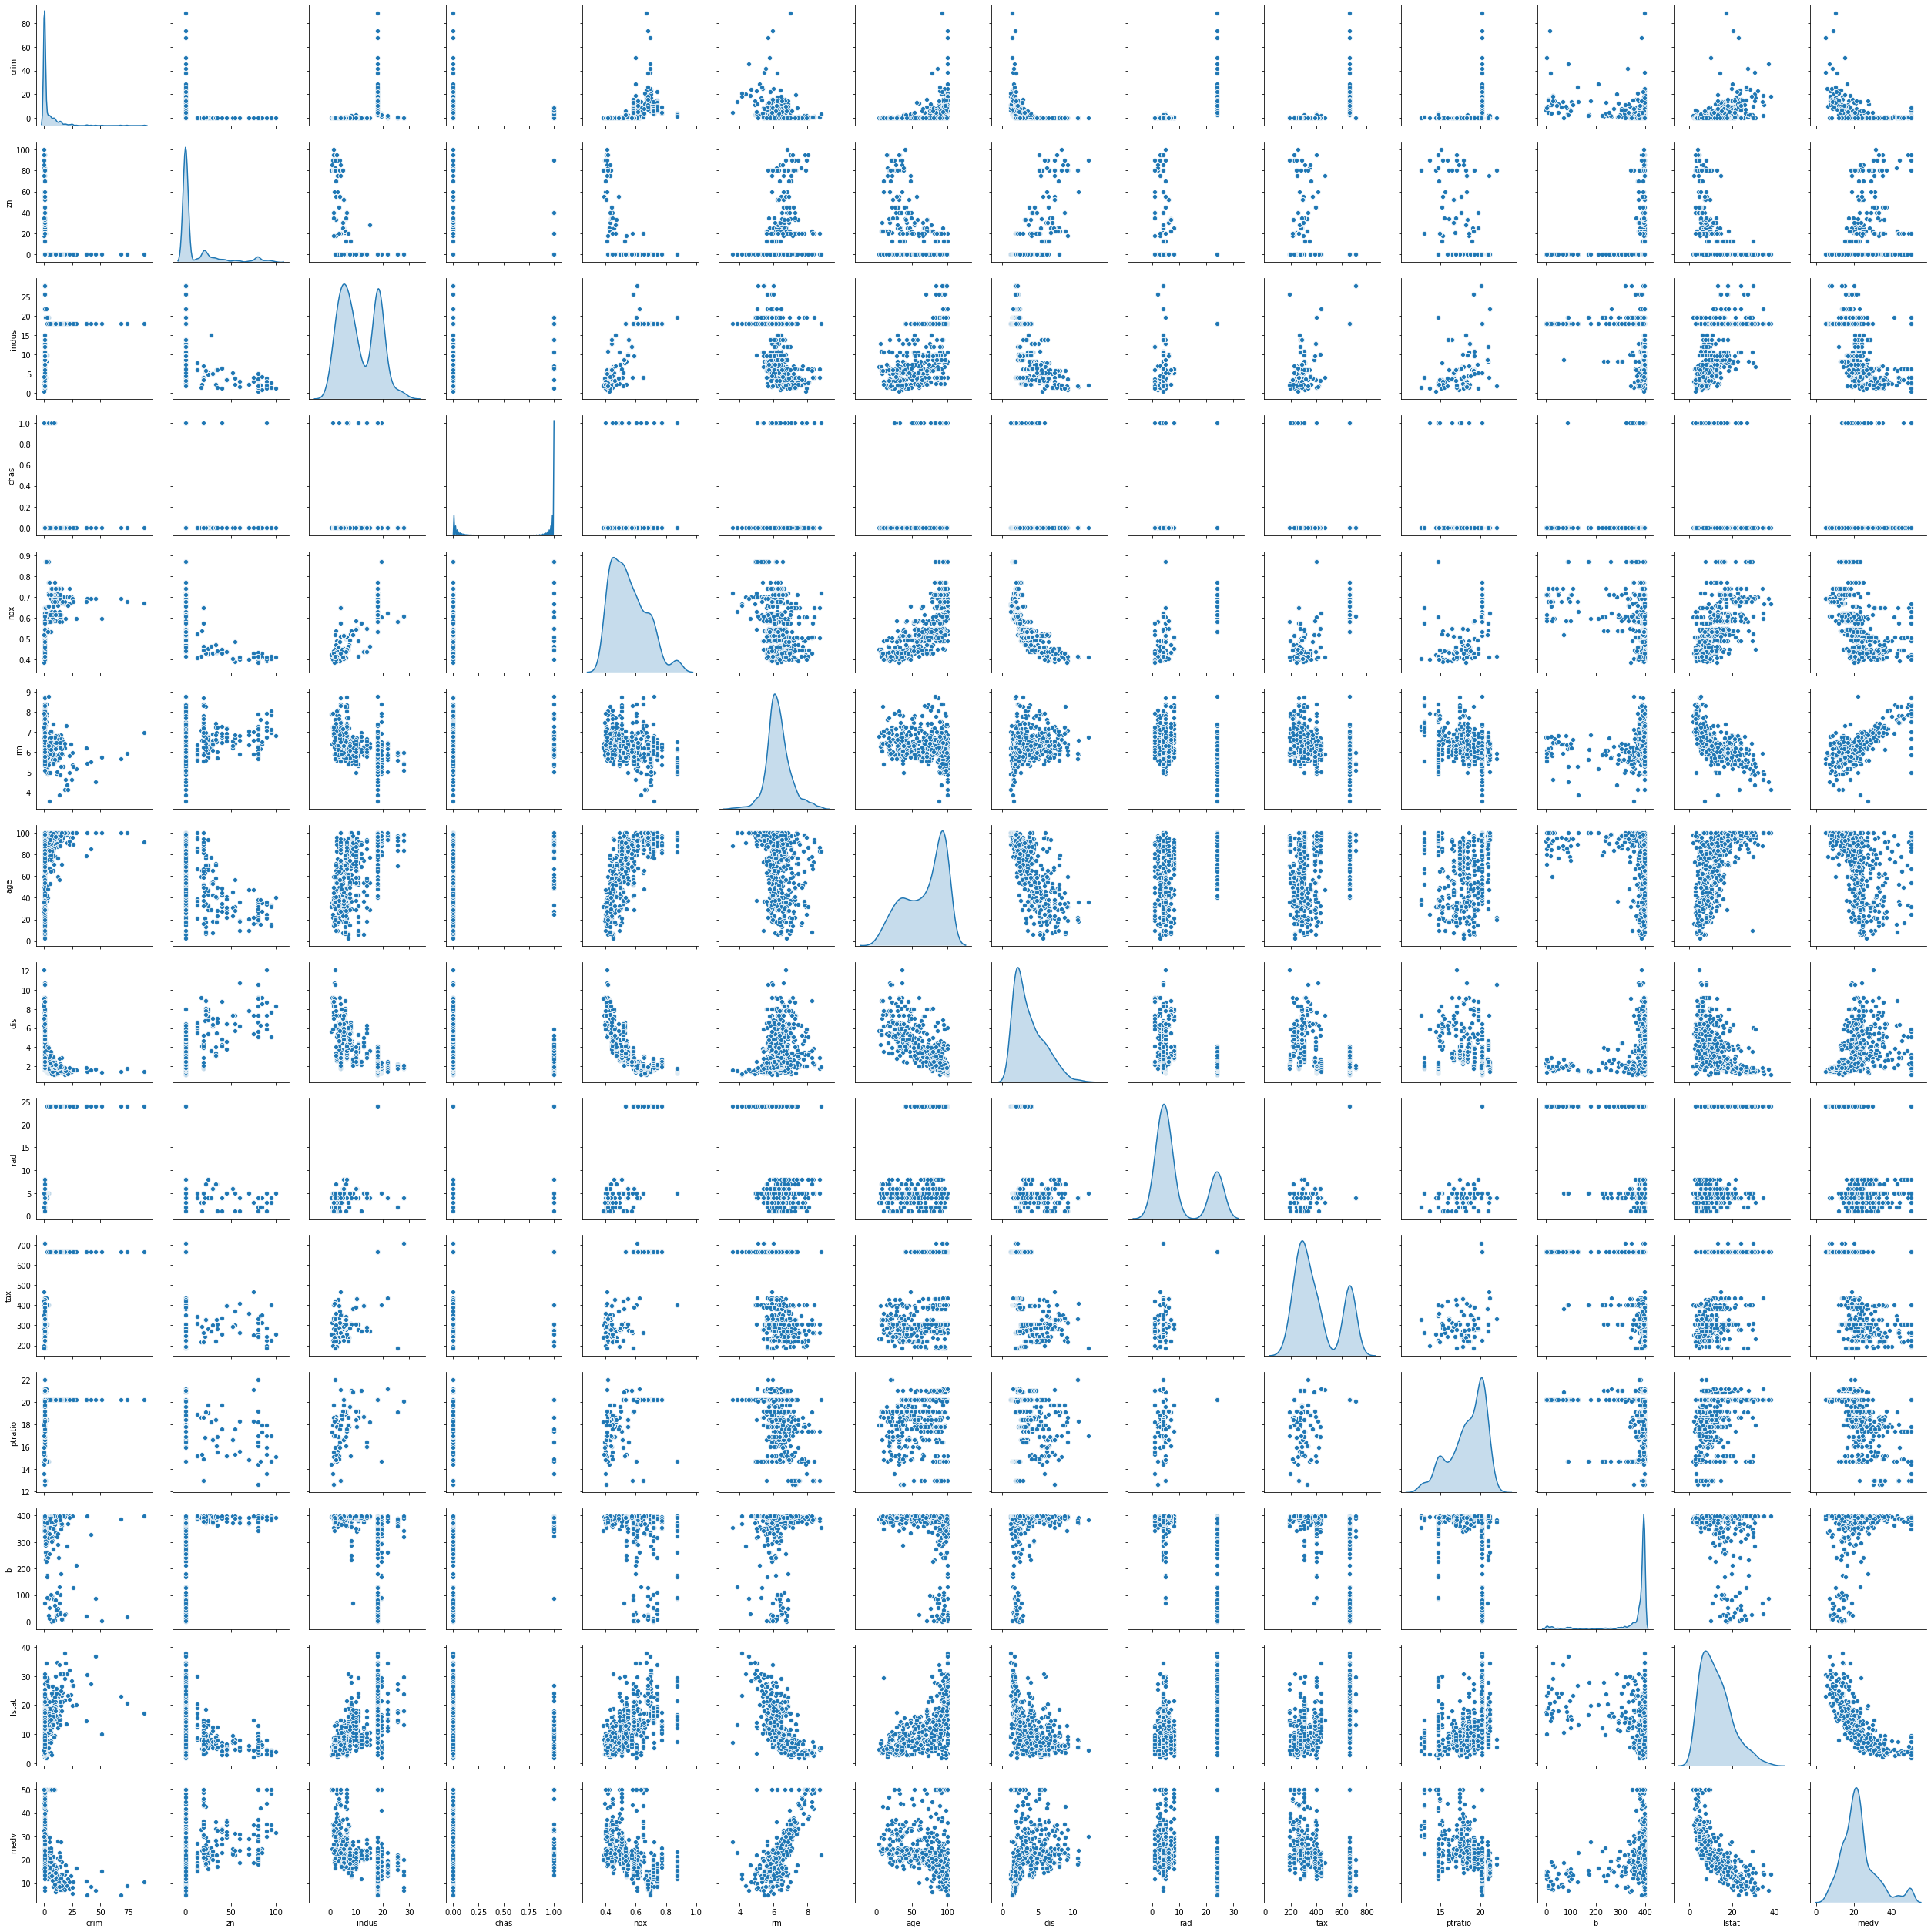

In [22]:
sns.pairplot(boston,diag_kind="kde")

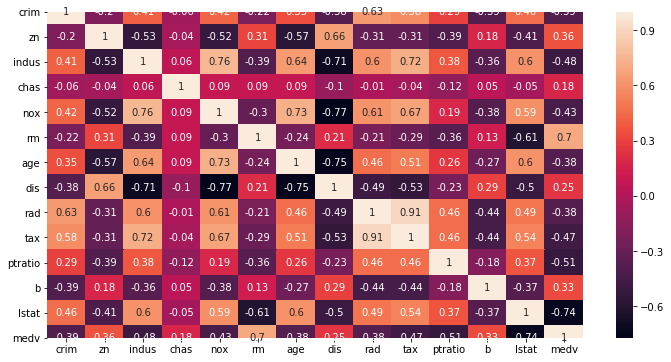

In [47]:
plt.figure(figsize=(12,6))
correlation=boston.corr().round(2)
sns.heatmap(correlation,annot=True)

In [49]:
X=boston[["rm","lstat","ptratio"]]
y=boston["medv"]

In [51]:
#MODEL 1 Linear Regression
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm=LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
predict=lm.predict(X_test)

In [72]:
from sklearn import metrics

In [67]:
a=metrics.mean_squared_error(y_test,predict)

In [77]:
print("R^2 ",(metrics.r2_score(y_test,predict)*100).round(2),"%")
print("The root mean squared error is ",np.sqrt(a))

R^2  66.99 %
The root mean squared error is  4.998372005150766


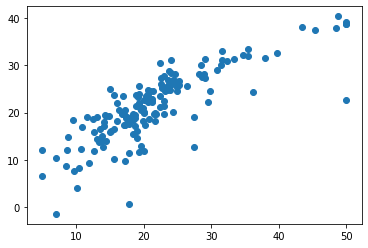

In [80]:
plt.scatter(y_test,predict)

In [ ]:
# Model 2 PCA 

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
Scaler=StandardScaler()

In [83]:
Scaler.fit(boston)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
scaled_data=Scaler.transform(boston)

In [139]:
from sklearn.decomposition import PCA

In [149]:
pca=PCA(n_components=2)

In [150]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [151]:
pca.explained_variance_ratio_ 

array([0.46757068, 0.11782371])

In [152]:
x_pca=pca.transform(scaled_data)

In [153]:
x_pca.shape

(506, 2)

In [154]:
names=boston.columns
names
comp=pd.DataFrame(pca.components_,columns=names)
comp

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.242284,-0.245435,0.331860,-0.005027,0.325194,-0.202817,0.296977,-0.298170,0.303413,0.324033,0.207680,-0.196638,0.311398,-0.266636
1,-0.065873,-0.148003,0.127076,0.410669,0.254278,0.434005,0.260304,-0.359148,0.031150,0.008851,-0.314623,0.026481,-0.201246,0.444925


In [155]:
X=comp.drop("medv",axis=1)

In [156]:
y=comp["medv"]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [158]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
prediction=lm.predict(X_test)

In [160]:
b=metrics.mean_squared_error(y_test,prediction)

In [161]:
print("The root mean squared error is ",np.sqrt(b))

The root mean squared error is  0.7115616083730767


In [ ]:
Root mean squared value of Model2 is less than Model 1  